In [1]:
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram

In [2]:
bit_string='0011'
n=len(bit_string)

def BV_oracle(bit_string, n):
    qc_oracle=QuantumCircuit(n+1)
    
    for i in range(n):
        if bit_string[i]=='1':
            qc_oracle.cx(i,n)
    
    oracle_gate= qc_oracle.to_gate()
    oracle_gate.name='U_s'
    return oracle_gate

def qc_circuit(oracle,n):

    BV_circuit=QuantumCircuit(n+1,n)

    BV_circuit.x(n)
    BV_circuit.h(n)

    for qubit in range(n):
        BV_circuit.h(qubit)
    
    BV_circuit.append(oracle,range(n+1))

    for qubit in range(n):
        BV_circuit.h(qubit)

    for i in range(n):
        BV_circuit.measure(i,i)
    
    return BV_circuit

oracle=BV_oracle(bit_string, n)
BV_circuit=qc_circuit(oracle,n)
       
BV_circuit.draw()

┌───┐     ┌──────┐┌───┐┌─┐         
q_0: ┤ H ├─────┤0     ├┤ H ├┤M├─────────
     ├───┤     │      │├───┤└╥┘┌─┐      
q_1: ┤ H ├─────┤1     ├┤ H ├─╫─┤M├──────
     ├───┤     │      │├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─────┤2 U_s ├┤ H ├─╫──╫─┤M├───
     ├───┤     │      │├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─────┤3     ├┤ H ├─╫──╫──╫─┤M├
     ├───┤┌───┐│      │└───┘ ║  ║  ║ └╥┘
q_4: ┤ X ├┤ H ├┤4     ├──────╫──╫──╫──╫─
     └───┘└───┘└──────┘      ║  ║  ║  ║ 
c: 4/════════════════════════╩══╩══╩══╩═
                             0  1  2  3

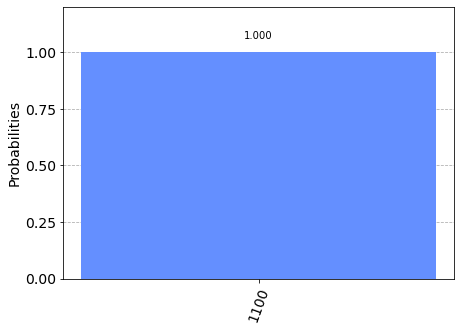

In [3]:
simulator=Aer.get_backend('qasm_simulator')
job_c=execute(BV_circuit,backend=simulator)
counts=job_c.result().get_counts()
plot_histogram(counts)

In [4]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
qcomp=provider.get_backend('ibmq_lima')
job_q = execute(BV_circuit, backend=qcomp)

/Users/marwa/opt/miniconda3/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [5]:
from qiskit.tools.monitor import job_monitor
job_monitor(job_q)

Job Status: job has successfully run


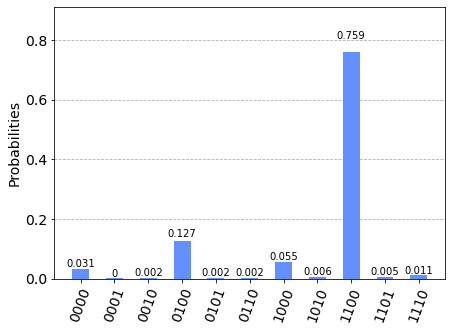

In [6]:
result_q=job_q.result()
plot_histogram(result_q.get_counts(BV_circuit))